### WGAN

* Модифицируйте код ячеек ниже и реализуйте [Wasserstein GAN](https://arxiv.org/abs/1701.07875) с клиппингом весов. (10 баллов)

* Замените клиппинг весов на [штраф градентов](https://arxiv.org/pdf/1704.00028v3.pdf). (10 баллов)

* Добавьте лейблы в WGAN, тем самым решая задачу [условной генерации](https://arxiv.org/pdf/1411.1784.pdf). (30 баллов)

Добавьте в этот файл анализ полученных результатов с различными графиками обучения и визуализацию генерации. Сравните как работает клиппинг весов и штраф градиентов и попробуйте пронаблюдать какие недостатки имеет модель GAN.

In [1]:
from lib.clients import WGANClipTrainer, WGANGPTrainer, DataloaderCreator
from lib.modules import Generator, Discriminator
from lib.dto import Optimizer
from torch.utils.tensorboard import SummaryWriter
from torch import optim
from loguru import logger
from lib.config import Config

In [2]:
config = Config()
config.num_epochs = 100
logger.info(f"Используем устройство: {config.device}")

2024-10-10 12:08:46.929 | INFO     | __main__:<module>:3 - Используем устройство: cpu


In [3]:
# Создаем dataloader
dataloader_creator = DataloaderCreator()

dataloader = dataloader_creator()
logger.info(f"Размер датасета: {len(dataloader.dataset)}")

2024-10-10 12:08:48.049 | INFO     | __main__:<module>:5 - Размер датасета: 60000


In [4]:
# Создаем модель GAN
generator = Generator(config.noise_size, config.num_classes, config.img_dim).to(config.device)
discriminator = Discriminator(config.num_classes, config.img_dim).to(config.device)

# Оптимизаторы
optimizer_generator = optim.Adam(generator.parameters(), lr=config.lr, betas=(config.beta1, config.beta2))
optimizer_discriminator = optim.Adam(discriminator.parameters(), lr=config.lr, betas=(config.beta1, config.beta2))

logger.info(f"Модели и оптимизаторы созданы")
logger.info(f"Генератор: {generator}")
logger.info(f"Дискриминатор: {discriminator}")

2024-10-10 12:08:48.468 | INFO     | __main__:<module>:9 - Модели и оптимизаторы созданы
2024-10-10 12:08:48.469 | INFO     | __main__:<module>:10 - Генератор: Generator(
  (label_emb): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Tanh()
  )
)
2024-10-10 12:08:48.469 | INFO     | __main__:<module>:11 - Дискриминатор: Discriminator(
  (label_emb): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=794, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)


2024-10-10 04:14:06.075 | INFO     | lib.clients:_log_mean_losses:136 - Epoch [1/100] Loss D_real: -1.1833, Loss D_fake: 0.6272, Loss G: -0.4982
2024-10-10 04:14:14.407 | INFO     | lib.clients:_log_mean_losses:136 - Epoch [2/100] Loss D_real: -1.5513, Loss D_fake: 1.1808, Loss G: -0.9724
2024-10-10 04:14:22.866 | INFO     | lib.clients:_log_mean_losses:136 - Epoch [3/100] Loss D_real: -1.1254, Loss D_fake: 0.8948, Loss G: -0.6826
2024-10-10 04:14:31.667 | INFO     | lib.clients:_log_mean_losses:136 - Epoch [4/100] Loss D_real: -1.2963, Loss D_fake: 1.1561, Loss G: -0.9510
2024-10-10 04:14:39.903 | INFO     | lib.clients:_log_mean_losses:136 - Epoch [5/100] Loss D_real: -1.2747, Loss D_fake: 1.2244, Loss G: -0.9928
2024-10-10 04:14:48.483 | INFO     | lib.clients:_log_mean_losses:136 - Epoch [6/100] Loss D_real: -2.0334, Loss D_fake: 1.9369, Loss G: -1.6490
2024-10-10 04:14:56.811 | INFO     | lib.clients:_log_mean_losses:136 - Epoch [7/100] Loss D_real: -0.9617, Loss D_fake: 0.8787, L

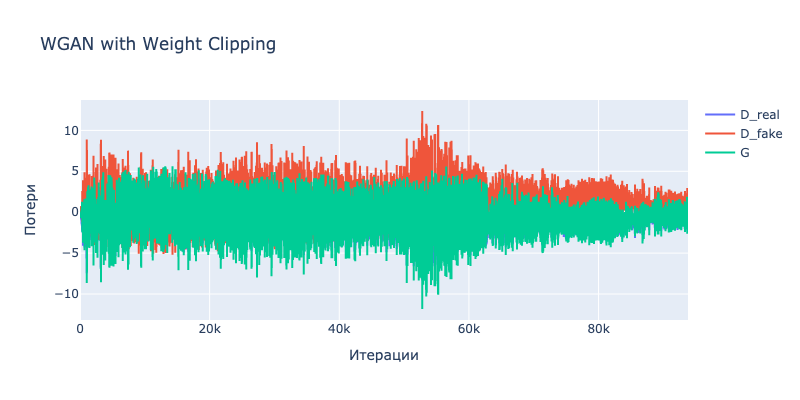

In [6]:
# WGAN с клиппингом весов
wgan_clip_trainer = WGANClipTrainer(
    generator=generator,
    discriminator=discriminator,
    config=config,
    writer=SummaryWriter('runs/WGAN-with-Weight-Clipping'),
    dataloader=dataloader,
)

optimizer = Optimizer(generator=optimizer_generator, discriminator=optimizer_discriminator)
wgan_clip_trainer(
    optimizer=optimizer,
)

2024-10-10 12:09:03.615 | INFO     | lib.clients:_log_mean_losses:129 - Epoch [1/100] Loss D_real: -12.8045, Loss D_fake: 2.2753, Loss G: -1.7947Loss GP: 2.2927
2024-10-10 12:09:14.519 | INFO     | lib.clients:_log_mean_losses:129 - Epoch [2/100] Loss D_real: -10.8912, Loss D_fake: 0.9784, Loss G: -0.4185Loss GP: 1.7872
2024-10-10 12:09:25.029 | INFO     | lib.clients:_log_mean_losses:129 - Epoch [3/100] Loss D_real: -10.1768, Loss D_fake: 4.3822, Loss G: -3.6708Loss GP: 0.9828
2024-10-10 12:09:35.958 | INFO     | lib.clients:_log_mean_losses:129 - Epoch [4/100] Loss D_real: -6.2895, Loss D_fake: 1.7874, Loss G: -1.1458Loss GP: 0.5392
2024-10-10 12:09:46.753 | INFO     | lib.clients:_log_mean_losses:129 - Epoch [5/100] Loss D_real: -5.6098, Loss D_fake: 2.1912, Loss G: -1.4981Loss GP: 0.3495
2024-10-10 12:09:57.230 | INFO     | lib.clients:_log_mean_losses:129 - Epoch [6/100] Loss D_real: -7.3336, Loss D_fake: 3.8673, Loss G: -3.1133Loss GP: 0.3680
2024-10-10 12:10:07.755 | INFO     | 

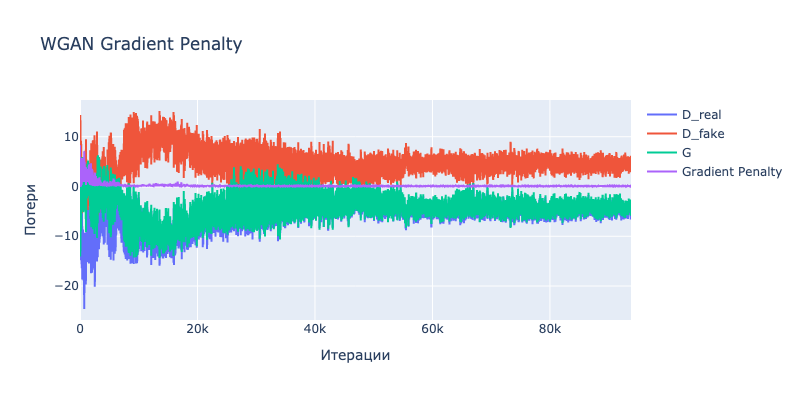

In [5]:
# WGAN с штрафом градиентов (WGAN-GP)
wgan_gp_trainer = WGANGPTrainer(
    generator=generator,
    discriminator=discriminator,
    config=config,
    writer=SummaryWriter('runs/WGAN-with-Gradient-Penalty'),
    dataloader=dataloader,
)

optimizer = Optimizer(generator=optimizer_generator, discriminator=optimizer_discriminator)
wgan_gp_trainer(optimizer=optimizer)

In [7]:
%tensorboard --logdir runs/WGAN-with-Weight-Clipping

In [8]:
%tensorboard --logdir runs/WGAN-with-Gradient-Penalty


## Потери (Losses)

- Loss D_real: Потери дискриминатора на реальных изображениях.
- Loss D_fake: Потери дискриминатора на сгенерированных (фейковых) изображениях.
- Loss G: Потери генератора.
- Gradient Penalty (только для WGAN-GP): Штраф за отклонение градиента.

## WGAN с Клиппингом Весов
Механизм:
- После каждого шага обновления дискриминатора веса ограничиваются в диапазоне [-c, c], где c — небольшой константой (обычно 0.01).

Преимущества:
- Простая реализация.
- Обеспечивает ограниченную обучаемость дискриминатора, что помогает сохранять несоответствие между реальными и фейковыми распределениями.

Недостатки:
- Жесткость ограничений: Клиппинг весов может привести к тому, что дискриминатор станет менее мощным и неспособен точно различать реальные и фейковые изображения.
- Проблемы с обучением: Может привести к затуханию градиентов и нестабильности обучения.
- Ограниченная выражающая способность: Модель может быть недостаточно сложной для точного моделирования распределения данных.

Графики Потерь:
- Потери дискриминатора могут колебаться, но генерированный генератор может демонстрировать менее качественные изображения.
- Штраф градиентов отсутствует, что может привести к менее гладкой обучающейся поверхности.

## WGAN-GP (С Штрафом Градиентов)
Механизм:
- Вместо клиппинга весов добавляется штраф за отклонение нормы градиента от 1, что стимулирует дискриминатор сохранять условие Липшица.

Преимущества:
- Стабильность обучения: Более плавный процесс обучения по сравнению с клиппингом весов.
- Лучшая генерация: Генератор может создавать более качественные изображения благодаря более точному дискриминатору.
- Избежание проблем с клиппингом: Нет необходимости в жестких ограничениях на веса.

Недостатки:
- Большее вычислительное потребление: Добавление штрафа градиентов увеличивает вычислительную нагрузку.
- Необходимость настройки гиперпараметров: Коэффициент штрафа (λ_gp) требует правильной настройки для оптимального обучения.

Графики Потерь:
- Потери дискриминатора и генератора обычно демонстрируют более стабильные тренды.
- Штраф градиентов регулярно добавляется, что видно на графиках.


## Практическое Сравнение

Стабильность Обучения:
- WGAN-GP обычно показывает более стабильное и предсказуемое обучение по сравнению с WGAN с клиппингом весов, который может страдать от колебаний в потерях.

Качество Генерируемых Изображений:
- WGAN-GP обычно генерирует более четкие и реалистичные изображения, тогда как WGAN с клиппингом весов может создавать более размытые или менее детализированные изображения из-за ограниченной способности дискриминатора.

Конвергенция:
- WGAN-GP может достичь лучших результатов за меньшее количество эпох по сравнению с WGAN с клиппингом весов.